# Introduction

### Context
The exploratory analysis plan developed in [Project 1](https://github.com/michaelcwong/GADataScience2017Summer/blob/master/Project%20%231%20Research%20Design%20Write-Up.ipynb) will be implemented in this notebook. 
Components of this exercise will be used for the modeling exercise in Project 3. To recap, the goal of the hypothetical study is to examine the various factors that may influence admission into graduate school. The hypothesis is that the outcome 'admit' = 1 is positively correlated with high values for predictors 'gre', 'gpa' and 'rank' (where a high rank is a smaller number).

### Exploratory Analysis Methods
As stated in Project 1, the exploratory analysis will examine basic characteristics of the data set using statistical and visualization methods. This will provide information about the range and variability of each data element, providing some early insight into the quality of data and the study population.

Specifically, the following steps will be taken: 
- Read the data from a csv file into an array
- Apply describe, skew and kurt methods obtain basic statistics on each column
- Create histograms, box plots and violin plots to visualize and examine the data distribution
- Examine correlations amongst the data attributes using a correlation matrix
- Summarize issues/limitations and findings

In [132]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [133]:
# Read the data set into an array
data = pd.read_csv("https://stats.idre.ucla.edu/stat/data/binary.csv")

# Data Distribution with Statistics

In [134]:
# Apply describe method on the array to obtain basic statistics on each column
data.describe()

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


In [135]:
# Apply skew method on the array to obtain measure of asymmetry
data.skew()

admit    0.787051
gre     -0.144357
gpa     -0.208698
rank     0.097223
dtype: float64

In [136]:
# Apply skew method on the array to obtain observations regarding outliers
data.kurt()

admit   -1.387513
gre     -0.331178
gpa     -0.579383
rank    -0.891587
dtype: float64

### Summary of Statistics
- The data set includes data for 400 students who applied.
- Knowing that the value of admit can only be 1 or 0, the significantly positive skew of ~0.79 and a mean of ~0.32, I can see that the majority of students were not admitted (more values are 0). In fact, the mean suggests ~32% admittance rate.
- GRE scores have a mean of ~588, with top 2 quartiles ranging ~220 points, bottom 2 ranging ~360 points and slightly negative skew. This indicates GRE scores tend to be higher than the mean (the distribution is mostly to the right of mean).
- GPA have a mean of ~3.4, top 2 quartiles ranging 0.605 points, bottom 2 ranging 1.135 and slightly negative skew. This indicates GPAs tend to be higher than the mean (the distribution is mostly to the right of mean).
- Rank can only have values of integers 1 to 4, has a mean of ~2.5 and a skewness that is very slightly positive. This indicates the distribution is mostly symmetric.
- All the data have negative kurtosis (of varying degrees), suggesting that, compared to a normal distribution, their tails are shorter and thinner (fewer outliers), the central peak is lower and broader. Admit and rank have the most negative kurtosis, owing to their discrete values.

# Data Distribution with Visualization

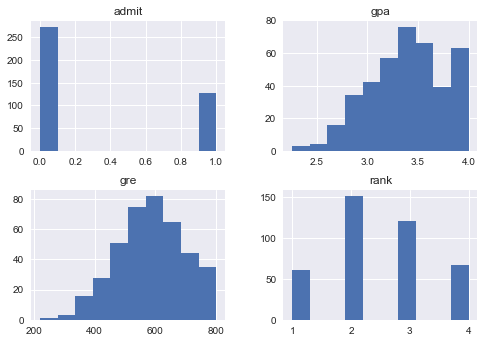

In [137]:
# Apply the hist and show functions to plot and show histograms of the 4 columns of data
data.hist();
plt.show()

The histograms provide information consistent with the statistics, with indications that:
- Admit is 0 nearly for two-thirds of the data set
- GRE values center around ~600 and have a negative skew
- GPA values center around ~3.4 and have a negative skew
- Rank has a mostly symmetric distribution
- There are relatively few outliers in the data set

Additionally, examining the distribution of values, there appear to be no unusual outliers or missing data.

In [138]:
# divide gre by 1000, to achieve values that are the same order of magnitude
# this enables plotting of all data on single pane
# note: from this point forward, gre = gre/1000
data['gre'] = np.divide(data['gre'],1000.0);

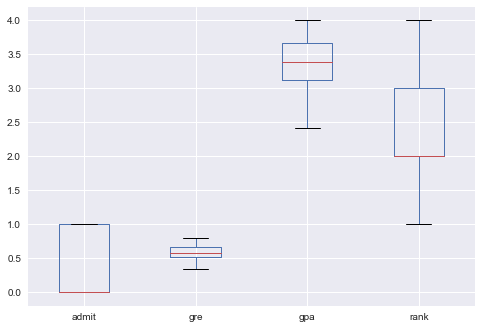

In [139]:
# Apply the box and show functions to plot and show box plots of the 4 columns of data
data.plot(kind='box');
plt.show();

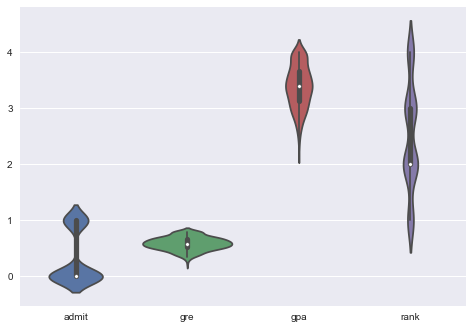

In [140]:
# Apply Seaborn libraries to plot distribution of data
sns.violinplot(data=data);
sns.plt.show()

The box and violin plots show:
- the distinct values of admit; the max and min values are the same as the 2nd and 3rd quartile boundaries in the box plot and the distribution in the violin plot is binary
- for gre and gpa: the 2nd and 3rd quartiles are relatively narrow (nearer to the median than max or min) in the box plot and the violin plot distribution has a relatively fat middle, meaning much of the population is in the middle of the values; data skew ever so slightly to higher values (negative skew) in both plots
- symmetry and distinct values of the rank data are apparent in the box and violin plots

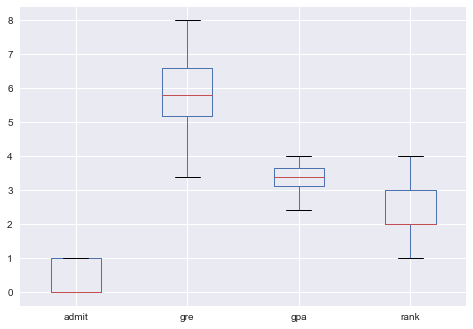

In [141]:
# examine the data on a different scale to see if the perspective changes analysis
# note: from this point forward, gre = gre/100
data['gre'] = np.multiply(data['gre'],10.0);
data.plot(kind='box');
plt.show();

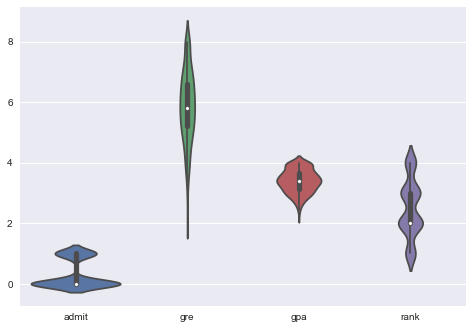

In [142]:
sns.violinplot(data=data);
plt.show();

The change in scale of the plots does not significantly change the conclusions made previously

# Correlation Matrix

In [143]:
## apply correlation method to view statistical correlation amongst variables
data.corr()

,admit,gre,gpa,rank
admit,1.000000,0.184434,0.178212,-0.242513
gre,0.184434,1.000000,0.384266,-0.123447
gpa,0.178212,0.384266,1.000000,-0.057461
rank,-0.242513,-0.123447,-0.057461,1.000000


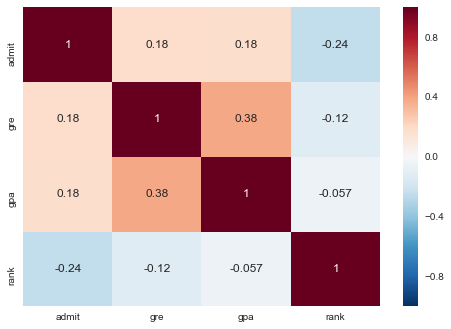

In [144]:
## use Seaborn heatmap to visualize statistical correlation amongst variables
sns.heatmap(data.corr(), annot=True);
plt.show();

The heatmap and correlation data shows: 
- a small positive correlation between admit and gre/gpa and a small negative correlation with rank; meaning with a high gre and gpa, along with a high ranking undergraduate school (the value for rank is lower), a student is more likely to be admitted
- there is a strong correlation between gre and gpa; students who score well on gre tend to have high gpa
- rank has a negative correlation with other variables, not surprisingly

# Issues & Limitations of Sample


While this has been a useful exercise to examine the data set:
- as mentioned in Project 1, caution should be considered when using this data as the population of students sampled and the time period of sampling are unknown
- there are other factors that are influential in determining admissions decisions than those included in the data set, such as race, household income and state/country of residence

It will be difficult to conclude that this sample is representative of a broader or intended population of study.

Interestingly, the subject of race, as it applies to college admissions decisions, has been a topic of interest in recent news, as the US Justice Department investigates Harvard University for complaints of discrimination against Asian Americans who applied to Harvard's undergraduates programs.

# Conclusions

The exploratory anaysis provides an understanding of the distribution of the data set and basic information about the potential correlation between variables and the outcome. This will prepare us for selecting and executing an approach to statistically test the hypothesis that the admissions decision (admit) is positively correlated with GRE scores, undergraduate GPA and rank of undergraduate alma mater. 